In [1]:
import numpy as np
import torch 
import pickle
import os
import matplotlib.pyplot as plt
import npm_nnf.utils.utils_kernels as KT 
import npm_nnf.utils.utils_load as load
import npm_nnf.density_estimation.utils_density as utils
import npm_nnf.density_estimation.utils_data as data

In [34]:
path_configs = '/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/configs_parameter_search'

In [112]:
def plot(a,b,n_plot=10000,save_path = '/Users/ulyssemarteau/Desktop/NIPS/Experiments/npm_nnf/npm_nnf/density_estimation/figures',ds = ds,clf = clf,fig_file = None,ymin = -0.1,ymax = 0.8):
    xtest = torch.linspace(a,b,n_plot)
    ytest = clf.predict(xtest)
    ydata_set =clf.predict(ds.X)
    ytestref = ds.apply_density(xtest)

    fig = plt.figure()
    plt.plot(xtest,ytest,lw = 2,label='learned',zorder = -1)
    plt.plot(xtest,ytestref,linestyle = 'dashed',lw = 3,label = 'ground truth')
    plt.scatter(ds.X,ydata_set,marker = '+',color = 'r',lw = 2,label = 'training points',zorder = 1)
    plt.legend()
    plt.xlabel("x",fontsize = 20)
    plt.ylabel("p(x)",fontsize = 20)
    
    plt.ylim(ymin = ymin,ymax = ymax)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=12)
    plt.tight_layout()
    if isinstance(fig_file,str):
        fig.savefig(open(os.path.join(save_path,fig_file),'wb') , format='pdf', dpi=1000)
    plt.show()

def score(clf,ds,n = 1000):
    x_test = ds.sample_from_density(n)
    return clf.score(x_test)

# Our method

In [115]:
config_file = 'config_1d_our_method.json'

In [116]:
clf,ds = load.load(os.path.join(path_configs,config_file))

## Visualisation 

2020-10-26 13:29:31,787  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-10-26 13:29:31,828  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-10-26 13:29:31,829  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


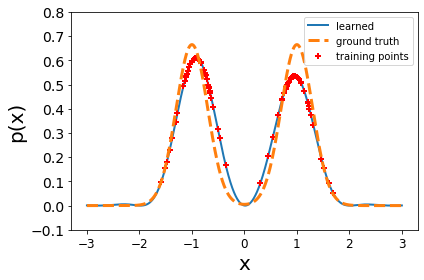

In [117]:
plot(-3,3,fig_file = '1d_our_model.pdf',clf = clf,ds = ds)

## Performance

In [118]:
score(clf,ds,n=100000)

tensor(-0.9359)

# Linear method

In [132]:
config_file = 'config_1d_linear_method.json'

In [133]:
clf,ds = load.load(os.path.join(path_configs,config_file))

## Visualisation 

2020-10-26 13:50:06,286  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-10-26 13:50:06,320  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-10-26 13:50:06,321  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


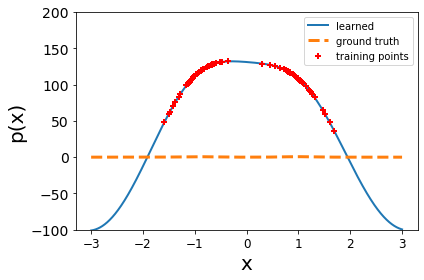

In [135]:
plot(-3,3,fig_file = '1d_linear_model.pdf',clf = clf,ds = ds,ymin = -100,ymax = 200)

## Performance

In [122]:
score(clf,ds,n=100000)

2020-10-26 13:29:37,008  root WARNING prediction contains negative probabilities; score set to np.nan


nan

# NCM method

In [123]:
config_file = 'config_1d_nw_method.json'

In [124]:
clf,ds = load.load(os.path.join(path_configs,config_file))

## Visualisation 

2020-10-26 13:29:37,114  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-10-26 13:29:37,158  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-10-26 13:29:37,158  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


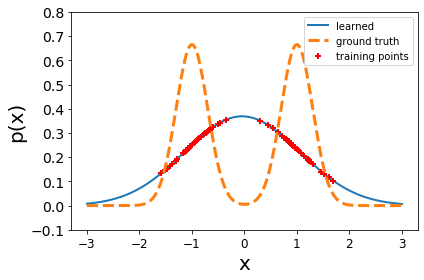

In [125]:
plot(-3,3,fig_file = '1d_nw_model.pdf',clf = clf,ds = ds)

## Performance

In [126]:
score(clf,ds,n=100000)

tensor(-1.4594)

# GLM method

In [127]:
config_file = 'config_1d_glm_method.json'

In [128]:
clf,ds = load.load(os.path.join(path_configs,config_file))

## Visualisation 

2020-10-26 13:29:38,420  matplotlib.backends.backend_pdf DEBUG Assigning font /b'F1' = '/opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2020-10-26 13:29:38,463  matplotlib.backends.backend_pdf DEBUG Embedding font /opt/miniconda3/envs/p36/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2020-10-26 13:29:38,463  matplotlib.backends.backend_pdf DEBUG Writing TrueType font.


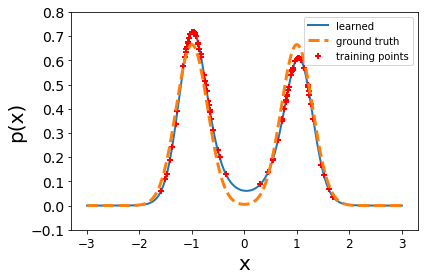

In [129]:
plot(-3,3,fig_file = '1d_glm_model.pdf',clf = clf,ds = ds)

## Performance

In [130]:
score(clf,ds,n=100000)

tensor(-0.9373)